# Introduction
This dataset consists of cases of Corona Virus Disease (Covid) Worldwide. Some notable features included in this dataset are the amount of countries, total cases per country, active cases, total recovered as well as the total death's of people sufferingf rom Covid-19. 


# Data Cleaning and Preparation

Before making an analysis, it is wise to clean the data as well as organize the data to be used for deeper analysis later on. My data cleaning methods and preperation for this dataset include:

1-Renaming Column names

2- Replacing strings from a column

3-Checking Missing Values

4-Changing the Data Type for selected columns

5-Dropping Rows with Null Values

6-Filling in some Missing Data from Internet Research

7-Dropping Columns



In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as coco

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('covid_worldwide.csv')


In [3]:
df.head(10)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
5,6,Japan,"32,588,442","68,399","21,567,425","10,952,618","92,144,639","125,584,838"
6,7,S. Korea,"30,197,066","33,486","29,740,877","422,703","15,804,065","51,329,899"
7,8,Italy,"25,453,789","186,833","25,014,986","251,970","265,478,247","60,262,770"
8,9,UK,"24,274,361","204,171","24,020,088","50,102","522,526,476","68,497,907"
9,10,Russia,"21,958,696","395,108","21,356,008","207,580","273,400,000","145,805,947"


In [4]:
df.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [5]:
df.dtypes

Serial Number       int64
Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object

In [6]:
column_change = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']

df['Total Cases'] = df['Total Cases'].str.replace(',', '').astype('float64')
df['Total Deaths'] = df['Total Deaths'].str.replace(',', '').astype('float64')
df['Total Recovered'] = df['Total Recovered'].str.replace(',', '').astype('float64')
df['Active Cases'] = df['Active Cases'].str.replace(',', '').astype('float64')
df['Total Test'] = df['Total Test'].str.replace(',', '').astype('float64')
df['Population'] = df['Population'].str.replace(',', '').astype('float64')

#Checking if changes has been made

df.dtypes

Serial Number        int64
Country             object
Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Total Test         float64
Population         float64
dtype: object

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64


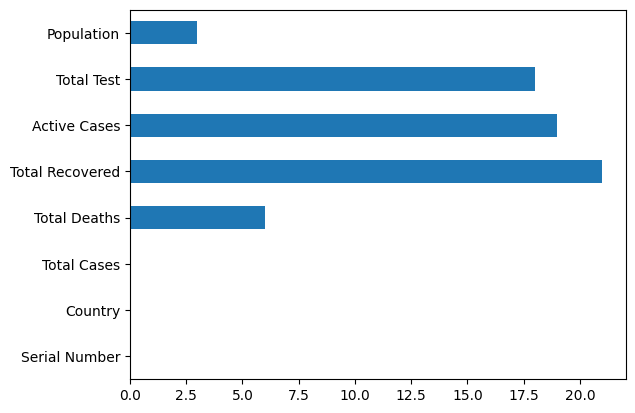

In [7]:
print(df.isna().sum())

df.isna().sum().plot.barh()

plt.show()

In [8]:
df[df['Total Recovered'].isna()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,11,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
65,66,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,78,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
94,95,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,112,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,113,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,114,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,118,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
136,137,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
138,139,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0


In [9]:
df.dropna(subset=['Total Recovered'], inplace=True)

In [10]:
df[df['Population'].isna()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
90,91,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
226,227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
229,230,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


In [11]:
df.loc[90, 'population'] = 1439323776

df.loc[90]

Serial Number                91
Country                   China
Total Cases            503302.0
Total Deaths             5272.0
Total Recovered        379053.0
Active Cases           118977.0
Total Test          160000000.0
Population                  NaN
population         1439323776.0
Name: 90, dtype: object

In [12]:
df['Total Deaths'].fillna(0, inplace=True)

In [13]:
df[df['Total Test'].isna()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,population
29,30,DPRK,4772813.0,74.0,4772739.0,0.0,NaN,25990679.0,NaN
150,151,Seychelles,50665.0,172.0,50440.0,53.0,NaN,99426.0,NaN
181,182,Nicaragua,18491.0,225.0,4225.0,14041.0,NaN,6779100.0,NaN
183,184,Tajikistan,17786.0,125.0,17264.0,397.0,NaN,9957464.0,NaN
190,191,Marshall Islands,15584.0,17.0,15528.0,39.0,NaN,60057.0,NaN
203,204,Comoros,8992.0,161.0,8827.0,4.0,NaN,907419.0,NaN
215,216,Kiribati,5008.0,18.0,2703.0,2287.0,NaN,123419.0,NaN
222,223,Saint Helena,2166.0,0.0,2.0,2164.0,NaN,6115.0,NaN
225,226,Niue,747.0,0.0,746.0,1.0,NaN,1622.0,NaN
226,227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN,NaN


In [14]:
df.drop(columns='Serial Number', inplace=True)

In [15]:
df.reset_index(inplace=True)

Text(0.5, 1.0, 'Top Countries with Total Cases')

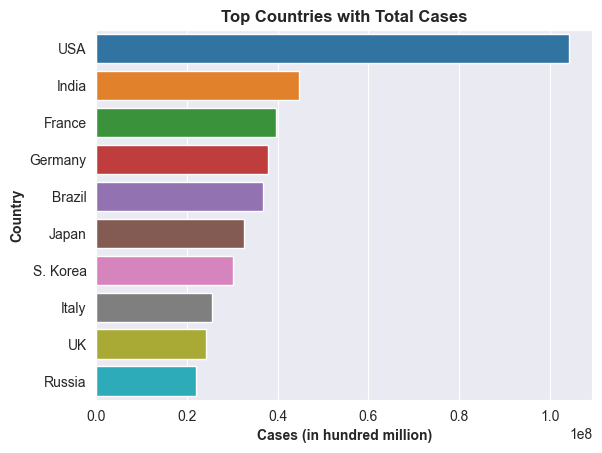

In [16]:
# Countries with total cases

country_case = df[['Country', 'Total Cases']]

country_case_plot = country_case.sort_values('Total Cases', ascending=False).head(10)

sns.set_style("darkgrid")

ccplot = sns.barplot(x='Total Cases', y='Country', data=country_case_plot)
ccplot.set_ylabel('Country', fontweight='bold')
ccplot.set_xlabel('Cases (in hundred million)', fontweight='bold')
ccplot.set_title('Top Countries with Total Cases', fontweight='heavy')

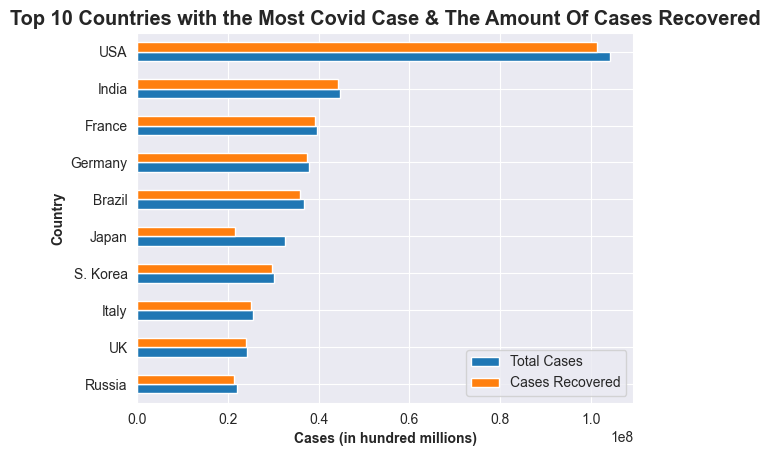

In [17]:
# Top 10 Countries with the most Covid Cases and The amount of people who recovered

case_recov = df[['Country', 'Total Cases', 'Total Recovered']]

case_recov_df = case_recov.head(10)

case_recov_df.sort_values('Total Cases').plot(x='Country', kind='barh', stacked=False)

plt.title("Top 10 Countries with the Most Covid Case & The Amount Of Cases Recovered", weight='heavy', fontsize='x-large')
plt.xlabel("Cases (in hundred millions)", weight='bold')
plt.ylabel("Country", weight='bold')

plt.legend(['Total Cases', 'Cases Recovered'])

plt.show()


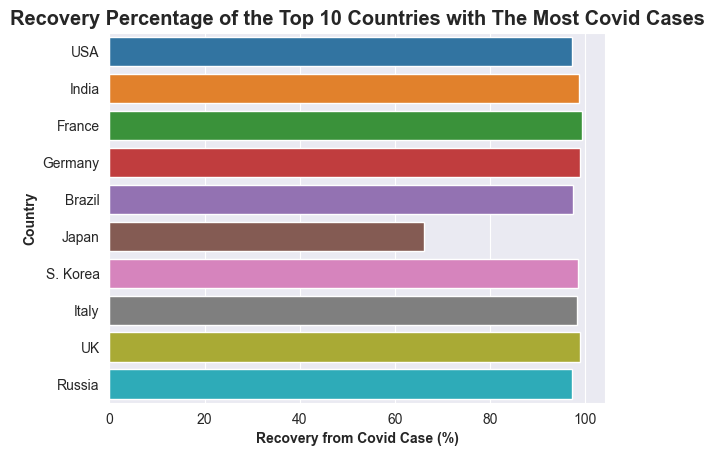

In [20]:
#Recovery Percentage from the Country's Total Case

case_recov_df['recov_perc'] = (df['Total Recovered'] / df['Total Cases']) * 100

case_recov_df['recov_perc']

recov_perc_plot = sns.barplot(data=case_recov_df, x='recov_perc', y='Country')

plt.title("Recovery Percentage of the Top 10 Countries with The Most Covid Cases", weight='heavy', fontsize='x-large')
plt.xlabel("Recovery from Covid Case (%)", weight='bold')
plt.ylabel("Country", weight='bold')

plt.show()
